In [368]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import simpson

N = 1000
v = np.full(N, -1)
gammaSquared = 200


In [369]:
def kSquared(energy, potential):
    return gammaSquared * (energy - potential)

def nextPsi(energy, potential, kPrevSquared, kPrevPrevSquared, psiPrev, psiPrevPrev):
    l = 1/N
    
    f1 = 2*(1 - 5/12 * l**2 * kPrevSquared) * psiPrev
    f2 = (1 + 1/12 * l**2 * kPrevPrevSquared) * psiPrevPrev
    f3 = 1 + 1/12 * l**2 * kSquared(energy, potential)
    
    return (f1 - f2) / f3
    

def integratePsi(energy):
    psi = np.zeros(N)
    psi[1] = 1e-4
    for i in range(2, N):
        psi[i] = nextPsi(energy, v[i],
            kSquared(energy, v[i-1]),
            kSquared(energy, v[i-2]),
            psi[i-1], psi[i-2]
            )
    return psi

def normalize(psi):
    integral = simpson(psi**2, dx=1/N)
    return psi/np.sqrt(integral)

def shoot(energy, tol=5e-4):
    de = 5e-3
    e = energy

    prevLastPsi = 0

    while(abs(de) > tol):
        psi = integratePsi(e)
        psi = normalize(psi)
        
        if psi[-1] * prevLastPsi < 0:
            de = -de/2

        prevLastPsi = psi[-1]
        e += de

    return e

def d2(f):
    res = np.zeros(N)
    for i in range(1, N-1):
        res[i] = N**2 * (psi[i-1] - 2 * psi[i] + psi[i+1])

    return res

## 3 & 4  -- Shooting method

[-0.9505533447265622, -0.8022128906249995, -0.5549783935546865, -0.20884985351562363, 0.2361715087890642, 0.7800869140625023, 1.4228963623046806, 2.1645998535156026, 3.0051961669921474, 3.9446865234374404]


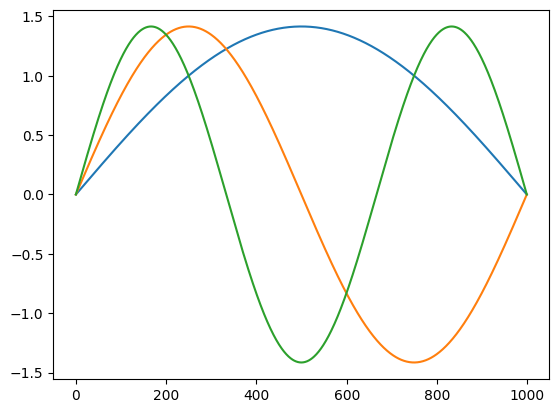

In [357]:
energy = -0.999
eigenEnergies = []
for i in range(10):
    energy = shoot(energy+5e-3, tol=1e-6)
    eigenEnergies.append(energy)

    if i<3:
        psi = integratePsi(energy)
        psi = normalize(psi)
        plt.plot(psi)

print(eigenEnergies)

## 6 -- Uncertainty relation

[-0.9505533447265622, -0.8022128906249995, -0.5549783935546865, -0.20884985351562363, 0.2361715087890642, 0.7800869140625023, 1.4228963623046806, 2.1645998535156026, 3.0051961669921474, 3.9446865234374404]


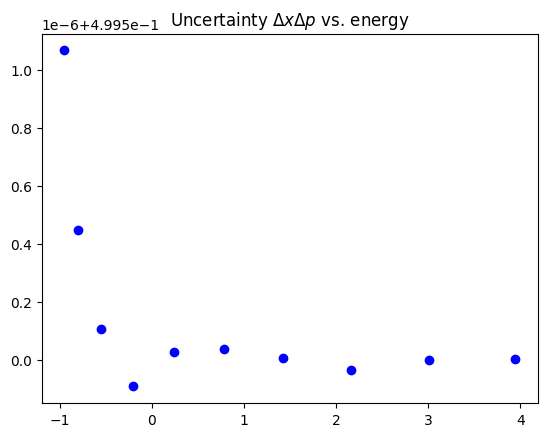

In [395]:
print(eigenEnergies)
plt.title("Uncertainty " + r"$\Delta x \Delta p$ vs. energy")

x = np.arange(0,1,1/N)
for e in eigenEnergies:
    psi = integratePsi(e)
    psi = normalize(psi)
    
    xSecondMoment = simpson(x * psi**2, dx = 1/N)

    pSecondMoment = -simpson(psi * d2(psi), dx = 1/N)

    deltaX = np.sqrt(xSecondMoment - 0.25)
    deltaP = np.sqrt(pSecondMoment)

    plt.plot(e, deltaX*deltaP, 'bo')

## 7 -- Harmonic Potential

In [359]:
v = np.arange(0,1,1/N)
v = 8*(v-0.5)**2 - 1

gammaSquared = 1000


0.4999971382898613
[-0.9105572804212569, -0.7316718342304227, -0.5527862426042552, -0.5527862420082087, -0.37389890038967066, -0.37389889979362423, -0.19499698960781015, -0.19499698901176368, -0.016005948424338345, -0.016005947828291896, 0.16339548385143385, 0.1633954844474803, 0.34423041856289033, 0.34423041915893676, 0.5288730267286315, 0.528873027324678, 0.7212788430452364, 0.9261541972160358, 1.1475298348665224, 1.1475298354625687]


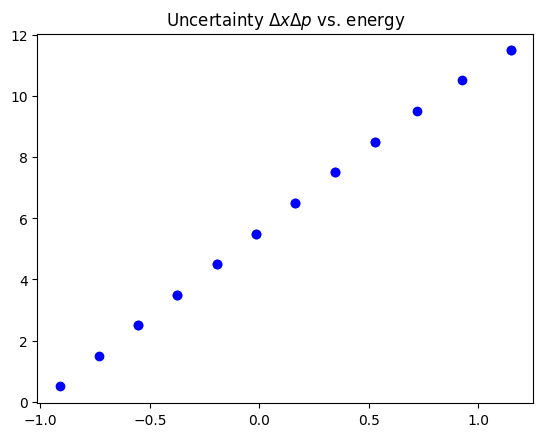

In [360]:
energy = -0.999
eigenEnergiesHarmonic = []
for i in range(20):
    energy = shoot(energy, tol=1e-9)
    eigenEnergiesHarmonic.append(energy)

    psi = integratePsi(energy)
    psi = normalize(psi)
    
    xSecondMoment = simpson(x**2 * psi**2, dx = 1/N)

    pSecondMoment = -simpson(psi * d2(psi), dx = 1/N)

    deltaX = np.sqrt(xSecondMoment - 0.25)
    deltaP = np.sqrt(pSecondMoment)

    plt.title("Uncertainty " + r"$\Delta x \Delta p$ vs. energy")
    plt.plot(energy, deltaX*deltaP, 'bo', linewidth=2)
    if i == 0:
        print(deltaX * deltaP)
    # if i>17:
    
    #     psi = integratePsi(energy)
    #     psi = normalize(psi)
    #     plt.plot(psi)


print(eigenEnergiesHarmonic)

1.001001001001001


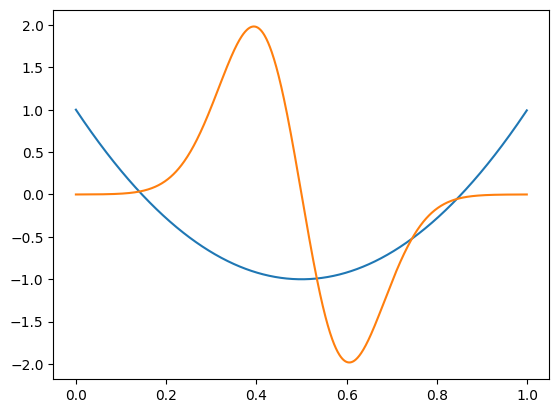

In [361]:
psi = integratePsi(-0.7316718342304227)
psi = normalize(psi)

plt.plot(np.arange(0, 1, 1/N), v)
plt.plot(np.arange(0, 1, 1/N), psi)

print(simpson(psi**2, dx=1/(N-1)))

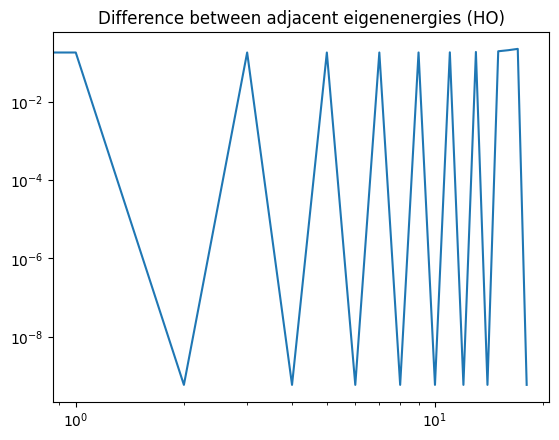

In [362]:
plt.title("Difference between adjacent eigenenergies (HO)")
energyDiff = [eigenEnergiesHarmonic[i+1]-eigenEnergiesHarmonic[i] for i in range(len(eigenEnergiesHarmonic)-1)]
plt.plot(energyDiff)
plt.xscale('log')
plt.yscale('log')